In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/NLPFinalProject/Dataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Generation,label
0,0,0,latest headlines on cnn business - google's go...,gpt2
1,1,1,china wants to take a victory lap over its han...,gpt2
2,2,2,coronavirus disinformation creates challenges ...,gpt2
3,3,3,china coronavirus: eating wild animals made il...,gpt2
4,4,4,china's economy could shrink for the first tim...,gpt2


In [ ]:
df.shape

(11726, 4)

In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Generation', 'label'], dtype='object')

In [ ]:
df.drop('Unnamed: 0.1', axis=1, inplace=True) 

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True) 

In [ ]:
df.head()

,Generation,label
0,latest headlines on cnn business - google's go...,gpt2
1,china wants to take a victory lap over its han...,gpt2
2,coronavirus disinformation creates challenges ...,gpt2
3,china coronavirus: eating wild animals made il...,gpt2
4,china's economy could shrink for the first tim...,gpt2


In [ ]:
df['len'] = df['Generation'].apply(lambda x: len(x.split(" ")))
df.head()

,Generation,label,len
0,latest headlines on cnn business - google's go...,gpt2,405
1,china wants to take a victory lap over its han...,gpt2,415
2,coronavirus disinformation creates challenges ...,gpt2,431
3,china coronavirus: eating wild animals made il...,gpt2,432
4,china's economy could shrink for the first tim...,gpt2,429


In [ ]:
df['label'].value_counts()

gpt2           1066
instructgpt    1066
human          1066
xlnet          1066
fair           1066
gpt            1066
ctrl           1066
pplm           1066
grover         1066
gpt3           1066
xlm            1066
Name: label, dtype: int64

In [ ]:
df['label'] = df['label'].replace({'gpt2': 0, 'instructgpt': 1, 'human': 2,'xlnet': 3,'fair': 4,'gpt': 5,'ctrl': 6,'pplm': 7,'grover': 8, 'gpt3': 9, 'xlm': 10})

In [ ]:
df['label'].value_counts()

0     1066
1     1066
2     1066
3     1066
4     1066
5     1066
6     1066
7     1066
8     1066
9     1066
10    1066
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_data = df['Generation']

In [ ]:
y_data = df['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_data,y_data, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
y_train

10190     9
8969      8
2592      2
2471      2
5272      4
         ..
11284    10
5191      4
5390      5
860       0
7270      6
Name: label, Length: 9380, dtype: int64

In [ ]:
from keras.utils import to_categorical

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout,GlobalMaxPool1D, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

In [ ]:
max_features = 88088
maxlen = 25
embedding_size = 200

In [ ]:
# preprocess input data
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(x_train))
X = tokenizer.texts_to_sequences(x_train)
X_train = pad_sequences(X, maxlen=maxlen)

In [ ]:
tokenizer.fit_on_texts(list(x_test))
X = tokenizer.texts_to_sequences(x_test)
X_test = pad_sequences(X, maxlen=maxlen)

In [ ]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

88088


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2023-03-24 23:03:14--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-03-24 23:03:14--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-03-24 23:03:14--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
glove_file = '/content/drive/MyDrive/NLPFinalProject/NLP Project/glove.6B.zip'

In [ ]:
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [ ]:
EMBEDDING_FILE = '/content/glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [ ]:
len(embeddings.values())

400000

In [ ]:
X_train.shape

(9380, 25)

In [ ]:
embedding_size

200

In [ ]:
from tensorflow.keras.layers import GlobalMaxPooling1D

In [ ]:
# preprocess output data
y_tra = np.asarray(y_train)
y_tra = y_tra[:, np.newaxis]  # add a new axis to make it 2D
y_one_hot_train = to_categorical(y_tra, num_classes=11)

In [ ]:
# preprocess output data
y_tes = np.asarray(y_test)
y_tes = y_tes[:, np.newaxis]  # add a new axis to make it 2D
y_one_hot_tes = to_categorical(y_tes, num_classes=11)

In [ ]:




# check the shapes of X and y_one_hot
print(X_train.shape)
print(y_one_hot_train.shape)

# create the model
model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen, weights=[embedding_matrix]))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalMaxPooling1D())

model.add(Dense(11, activation="softmax"))

# compile and train the model
batch_size = 100
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_one_hot_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

(9380, 25)
(9380, 11)
Epoch 1/10
76/76 [==============================] - 23s 174ms/step - loss: 1.9868 - accuracy: 0.3350 - val_loss: 1.4781 - val_accuracy: 0.4686
Epoch 2/10
76/76 [==============================] - 9s 116ms/step - loss: 1.2632 - accuracy: 0.5610 - val_loss: 1.1961 - val_accuracy: 0.5549
Epoch 3/10
76/76 [==============================] - 4s 53ms/step - loss: 0.9651 - accuracy: 0.6695 - val_loss: 1.1134 - val_accuracy: 0.5906
Epoch 4/10
76/76 [==============================] - 5s 64ms/step - loss: 0.7965 - accuracy: 0.7305 - val_loss: 1.0726 - val_accuracy: 0.6023
Epoch 5/10
76/76 [==============================] - 4s 56ms/step - loss: 0.6012 - accuracy: 0.8073 - val_loss: 1.0915 - val_accuracy: 0.5896
Epoch 6/10
76/76 [==============================] - 4s 50ms/step - loss: 0.4290 - accuracy: 0.8743 - val_loss: 1.1340 - val_accuracy: 0.6157
Epoch 7/10
76/76 [==============================] - 2s 21ms/step - loss: 0.3015 - accuracy: 0.9188 - val_loss: 1.1752 - val_accur

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_one_hot_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_one_hot_tes, verbose=0)

In [ ]:
from matplotlib import pyplot

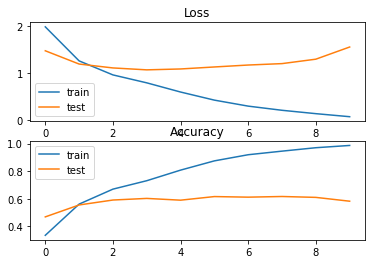

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
predictions = model.predict(X_test)

74/74 [==============================] - 1s 3ms/step


In [ ]:
predictions

array([[8.86992086e-04, 1.04060135e-04, 7.60244948e-05, ...,
        3.85926833e-05, 1.03101753e-04, 1.44936239e-05],
       [1.68786828e-05, 7.06681865e-04, 9.04594490e-05, ...,
        1.27314019e-03, 1.31903525e-05, 1.56755885e-03],
       [2.39937610e-04, 1.54590979e-02, 1.79580934e-02, ...,
        6.46127537e-02, 2.62339367e-04, 4.09462489e-02],
       ...,
       [2.15963856e-03, 1.88874155e-02, 7.79848814e-01, ...,
        1.25649914e-01, 2.13274825e-03, 2.41382630e-04],
       [1.21789426e-03, 1.47933746e-02, 1.36523992e-01, ...,
        5.34431497e-03, 3.17278551e-04, 1.10911485e-03],
       [1.76902453e-04, 7.95433521e-01, 4.49875323e-03, ...,
        2.84057995e-03, 1.94620982e-01, 2.63721682e-04]], dtype=float32)

In [ ]:
y_pred_one_hot = np.argmax(predictions, axis=1)
y_test_one_hot = np.argmax(y_one_hot_tes, axis=1)

In [ ]:
f1_macro = f1_score(y_test_one_hot, y_pred_one_hot, average="macro")

print("F1 macro score:", f1_macro)

F1 macro score: 0.4110913786091235
